In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("past_30_days_data.csv")

In [4]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-03-11T19:20:27.885Z,59.911500,-153.398900,135.40,1.40,ml,NaN,NaN,NaN,0.56,...,2023-03-11T19:22:41.856Z,"41 km ENE of Pedro Bay, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
1,2023-03-11T19:11:58.610Z,56.882400,-156.937800,0.00,1.90,ml,NaN,NaN,NaN,0.74,...,2023-03-11T19:21:08.949Z,"75 km SSE of Ugashik, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
2,2023-03-11T19:10:41.680Z,51.858000,-178.090333,3.23,1.86,ml,9.0,128.0,NaN,0.16,...,2023-03-11T19:57:47.060Z,"100 km W of Adak, Alaska",earthquake,0.42,0.36,0.232922,9.0,reviewed,av,av
3,2023-03-11T19:09:39.480Z,51.836333,-178.037667,-0.80,0.66,ml,5.0,129.0,NaN,0.31,...,2023-03-11T19:54:25.170Z,"96 km W of Adak, Alaska",earthquake,0.89,3.53,0.238645,4.0,reviewed,av,av
4,2023-03-11T19:09:10.560Z,51.860667,-178.080333,3.31,0.65,ml,5.0,199.0,NaN,0.13,...,2023-03-11T19:51:46.970Z,"Andreanof Islands, Aleutian Islands, Alaska",earthquake,0.54,0.45,0.126377,5.0,reviewed,av,av


### Features in the dataset

* time ---------------------- Time when the event occurred. Times are reported in milliseconds since the epoch 
* latitude ------------------- Decimal degrees latitude. Negative values for southern latitudes.
* longitude ------------------ Decimal degrees longitude. Negative values for western longitudes.
* depth ---------------------- Depth of the event in kilometers.
* mag ------------------------ Magnitude of event occured.
* magType -------------------- The method or algorithm used to calculate the preferred magnitude
* nst ------------------------ The total number of seismic stations used to determine earthquake location.
* gap ------------------------ The largest azimuthal gap between azimuthally adjacent stations (in degrees).
* dmin ----------------------- Horizontal distance from the epicenter to the nearest station (in degrees).
* rms ------------------------ The root-mean-square (RMS) travel time residual, in sec, using all weights.
* net ------------------------- The ID of a data source contributor for event occured.
* id -------------------------- A unique identifier for the event. 
* types ----------------------- A comma-separated list of product types associated to this event.
* place ----------------------- named geographic region near to the event.
* type ------------------------ Type of seismic event.
* locationSource -------------- The network that originally authored the reported location of this event.
* magSource ------------------- Network that originally authored the reported magnitude for this event.
* horizontalError ------------- Uncertainty of reported location of the event in kilometers.
* depthError ------------------ The depth error, three principal errors on a vertical line.
* magError -------------------- Uncertainty of reported magnitude of the event.
* magNst ---------------------- The total number of seismic stations to calculate the magnitude of earthquake.
* status ---------------------- Indicates whether the event has been reviewed by a human.


In [5]:
len(df)

11400

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11400 entries, 0 to 11399
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11400 non-null  object 
 1   latitude         11400 non-null  float64
 2   longitude        11400 non-null  float64
 3   depth            11400 non-null  float64
 4   mag              11400 non-null  float64
 5   magType          11400 non-null  object 
 6   nst              8338 non-null   float64
 7   gap              8336 non-null   float64
 8   dmin             5499 non-null   float64
 9   rms              11400 non-null  float64
 10  net              11400 non-null  object 
 11  id               11400 non-null  object 
 12  updated          11400 non-null  object 
 13  place            11400 non-null  object 
 14  type             11400 non-null  object 
 15  horizontalError  7885 non-null   float64
 16  depthError       11400 non-null  float64
 17  magError    

In [7]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                3062
gap                3064
dmin               5901
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3515
depthError            0
magError           3086
magNst             3074
status                0
locationSource        0
magSource             0
dtype: int64

In [8]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,11400.000000,11400.000000,11400.000000,11400.000000,8338.000000,8336.000000,5499.000000,11400.000000,7885.000000,11400.000000,8314.000000,8326.000000
mean,44.178396,-126.130431,23.309613,1.562565,20.056608,128.859157,0.590312,0.296431,1.571551,1.737355,0.224758,15.162863
std,18.405245,62.202031,51.787467,1.216033,23.601392,67.387699,1.869423,0.275771,2.763405,4.287421,0.256392,26.383112
min,-64.335800,-179.968900,-3.500000,-1.230000,0.000000,14.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,36.528933,-155.323917,2.610000,0.840000,6.000000,75.000000,0.012955,0.090000,0.290000,0.430000,0.120841,5.000000
50%,51.429350,-147.657050,6.990000,1.330000,13.000000,115.000000,0.052320,0.180000,0.500000,0.730000,0.177139,9.000000
75%,58.233333,-117.888650,17.672500,2.000000,25.000000,170.000000,0.193500,0.490000,1.020000,1.420000,0.248000,17.000000
max,86.154600,179.996000,613.906000,6.900000,886.000000,349.000000,33.900000,1.900000,28.260000,232.900000,5.130000,614.000000


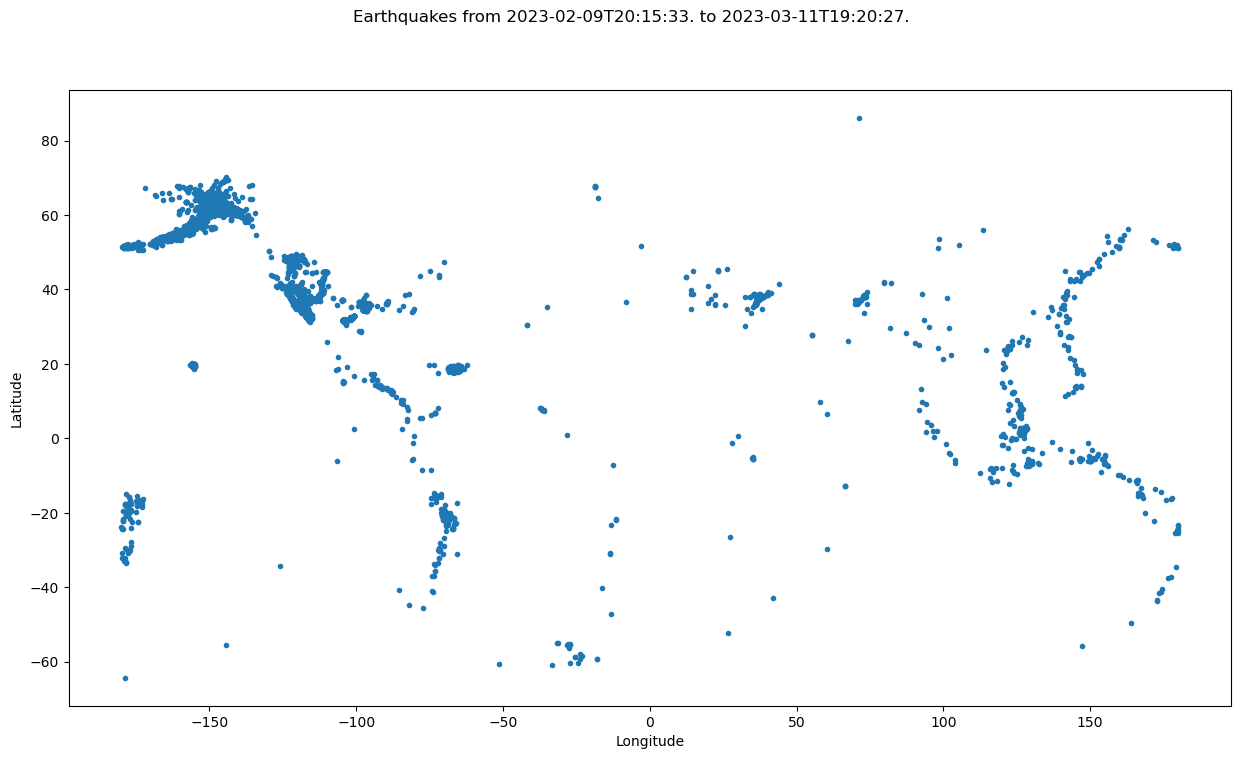

In [10]:
rounding_factor = 10
fig, ax = plt.subplots(figsize=(15,8))

# latitude and longitude of earthquake site of top 10000 samples.
plt.plot(np.round(df['longitude'].head(10000),rounding_factor), 
         np.round(df['latitude'].head(10000),rounding_factor),
         linestyle='none', marker='.')

plt.suptitle('Earthquakes from ' + str(np.min(df['time']))[:20] + ' to ' + str(np.max(df['time']))[:20])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
#extracting the date from the time column
df = df.sort_values('time', ascending=True)

In [12]:
df['date'] = df['time'].str[0:10]

In [13]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
11399,2023-02-09T20:15:33.395Z,39.7177,-119.862400,10.50,0.80,ml,3.0,207.44,0.13400,0.0599,...,"9 km N of Lemmon Valley, Nevada",earthquake,NaN,10.200,0.54,3.0,reviewed,nn,nn,2023-02-09
11398,2023-02-09T20:17:16.860Z,-41.6888,42.540800,10.00,4.50,mb,19.0,89.00,19.18700,0.7200,...,Prince Edward Islands region,earthquake,10.88,1.796,0.14,15.0,reviewed,us,us,2023-02-09
11397,2023-02-09T20:21:30.892Z,40.1412,-119.713600,12.00,0.20,ml,3.0,229.57,0.03200,0.1168,...,Nevada,earthquake,NaN,3.600,0.05,2.0,reviewed,nn,nn,2023-02-09
11396,2023-02-09T20:24:04.320Z,36.7535,-121.594500,-0.33,1.25,md,18.0,162.00,0.02597,0.1200,...,"7km ESE of Prunedale, CA",quarry blast,0.36,31.610,0.20,15.0,reviewed,nc,nc,2023-02-09
11395,2023-02-09T20:29:55.520Z,38.7785,-122.756668,1.43,0.75,md,8.0,100.00,0.01052,0.0100,...,"0km N of The Geysers, CA",earthquake,0.33,0.740,0.20,7.0,automatic,nc,nc,2023-02-09


In [14]:
#data cleaning on the place column. Extracting places after the , using .split() method
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]
newdf = df['place'].str.split(', ', expand=True)

In [16]:
newdf.head()

,0,1,2
11399,9 km N of Lemmon Valley,Nevada,None
11398,Prince Edward Islands region,None,None
11397,Nevada,None,None
11396,7km ESE of Prunedale,CA,None
11395,0km N of The Geysers,CA,None


In [17]:
df['place'] = newdf[1]

In [18]:
df.head()

,date,latitude,longitude,depth,mag,place
11399,2023-02-09,39.7177,-119.862400,10.50,0.80,Nevada
11398,2023-02-09,-41.6888,42.540800,10.00,4.50,None
11397,2023-02-09,40.1412,-119.713600,12.00,0.20,None
11396,2023-02-09,36.7535,-121.594500,-0.33,1.25,CA
11395,2023-02-09,38.7785,-122.756668,1.43,0.75,CA


In [19]:
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]

In [20]:
df.head()

,date,latitude,longitude,depth,mag,place
11399,2023-02-09,39.7177,-119.862400,10.50,0.80,Nevada
11398,2023-02-09,-41.6888,42.540800,10.00,4.50,None
11397,2023-02-09,40.1412,-119.713600,12.00,0.20,None
11396,2023-02-09,36.7535,-121.594500,-0.33,1.25,CA
11395,2023-02-09,38.7785,-122.756668,1.43,0.75,CA


In [21]:
#typecasted into a set to avoid duplicate locations
print('total locations:',len(set(df['place'])))

total locations: 104


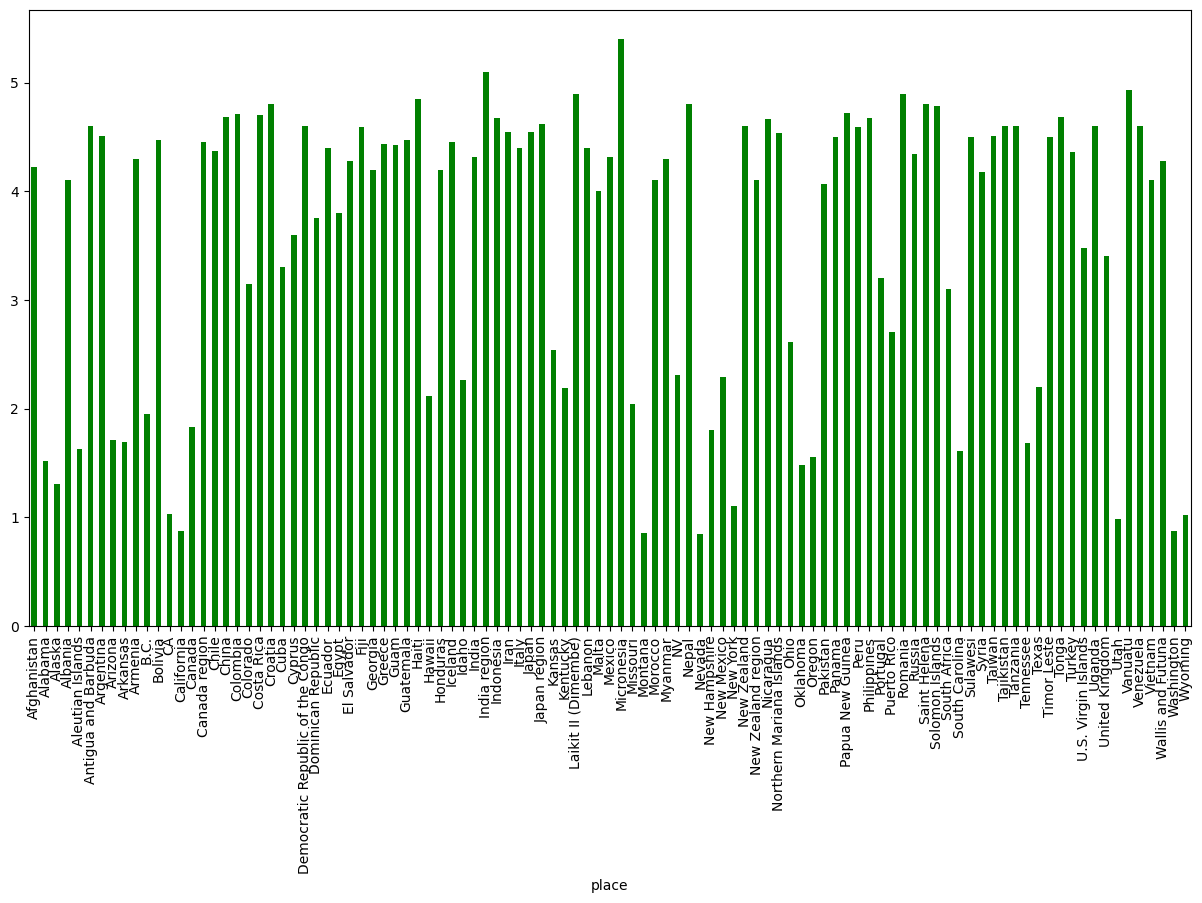

In [24]:
#bar plot of magnitude vs place
df.groupby(['place'])['mag'].mean().plot(kind='bar',figsize=(15,8), color = "green");

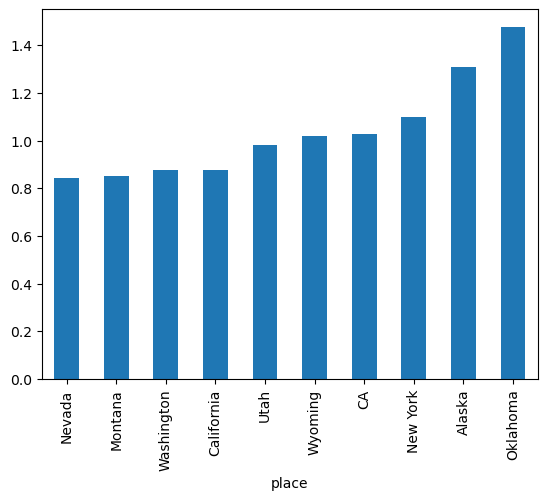

In [27]:
#the least affected places
df.groupby(['place'])['mag'].mean().nsmallest(10).plot(kind='bar');

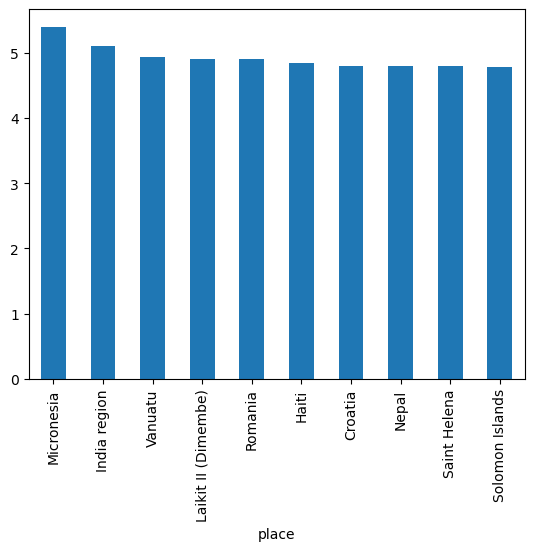

In [28]:
#most affected places
df.groupby(['place'])['mag'].mean().nlargest(10).plot(kind='bar');

In [29]:
df.groupby('place')['mag'].mean()

place
Afghanistan          4.220000
Alabama              1.520000
Alaska               1.306938
Albania              4.100000
Aleutian Islands     1.623972
                       ...   
Venezuela            4.600000
Vietnam              4.100000
Wallis and Futuna    4.275000
Washington           0.876761
Wyoming              1.017872
Name: mag, Length: 103, dtype: float64

In [30]:
df["mag"].mean()

1.5625649122271952

In [31]:
dangerous_places=df.groupby('place')['mag'].mean()

In [32]:
dangerous_places

place
Afghanistan          4.220000
Alabama              1.520000
Alaska               1.306938
Albania              4.100000
Aleutian Islands     1.623972
                       ...   
Venezuela            4.600000
Vietnam              4.100000
Wallis and Futuna    4.275000
Washington           0.876761
Wyoming              1.017872
Name: mag, Length: 103, dtype: float64

In [33]:
dangerous_places=dangerous_places[dangerous_places>3]

In [34]:
dangerous_places

place
Afghanistan            4.220000
Albania                4.100000
Antigua and Barbuda    4.600000
Argentina              4.510000
Armenia                4.300000
                         ...   
United Kingdom         3.400000
Vanuatu                4.936364
Venezuela              4.600000
Vietnam                4.100000
Wallis and Futuna      4.275000
Name: mag, Length: 73, dtype: float64

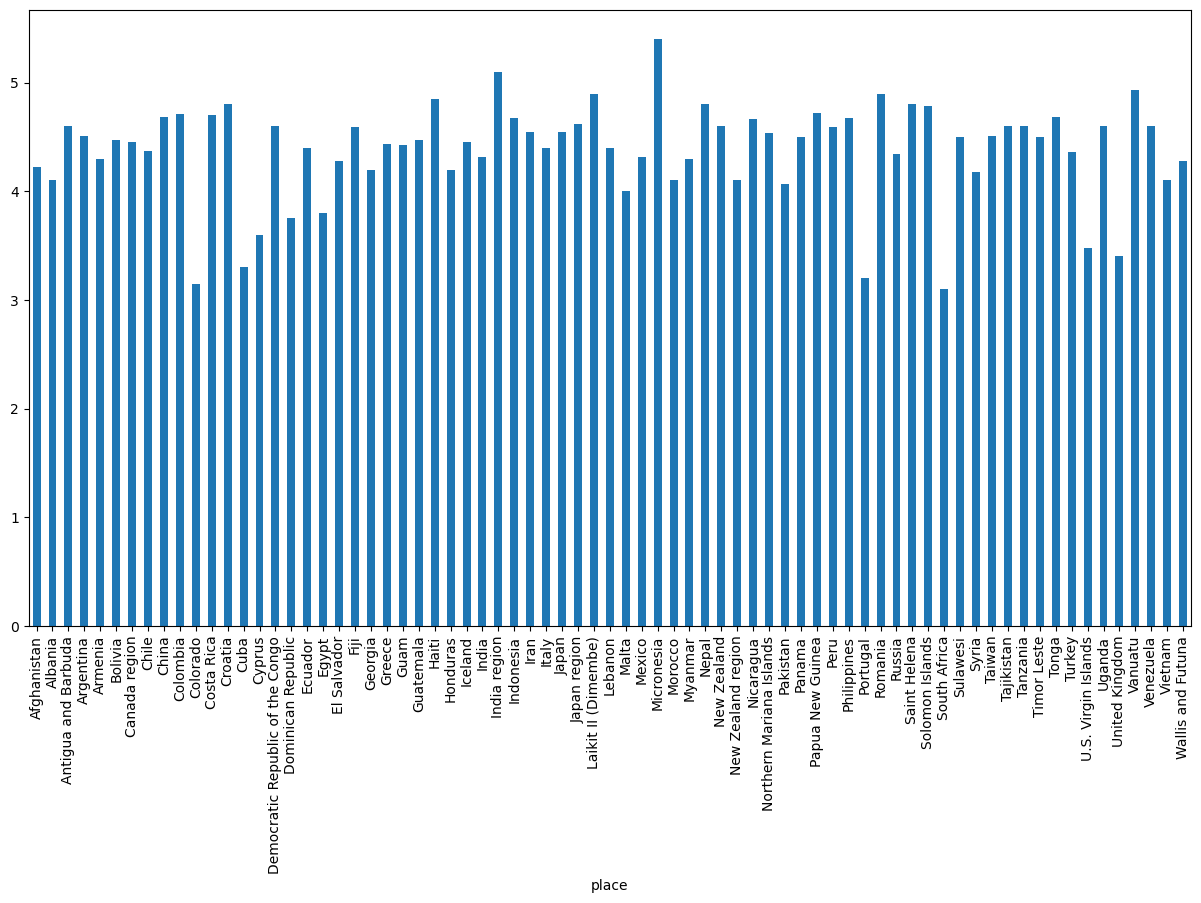

In [42]:
dangerous_places.plot(kind="bar",figsize=(15,8));

In [43]:
#calculating mean of latitude and longitude to identify earthquake prone regions
df_cords= df[['place', 'latitude', 'longitude']]

In [44]:
df_cords

,place,latitude,longitude
11399,Nevada,39.717700,-119.862400
11398,None,-41.688800,42.540800
11397,None,40.141200,-119.713600
11396,CA,36.753500,-121.594500
11395,CA,38.778500,-122.756668
...,...,...,...
4,Aleutian Islands,51.860667,-178.080333
3,Alaska,51.836333,-178.037667
2,Alaska,51.858000,-178.090333
1,Alaska,56.882400,-156.937800


In [47]:
df_cords = df_cords.groupby(['place'], as_index=False).mean()

In [49]:
df_cords.head()

,place,latitude,longitude
0,Afghanistan,36.627360,70.718367
1,Alabama,34.598167,-85.455833
2,Alaska,58.021202,-158.666094
3,Albania,40.987900,19.677000
4,Aleutian Islands,51.938996,-158.493485


In [52]:
df_cords = df_cords[['place', 'latitude', 'longitude']]

In [53]:
df_cords.head()

,place,latitude,longitude
0,Afghanistan,36.627360,70.718367
1,Alabama,34.598167,-85.455833
2,Alaska,58.021202,-158.666094
3,Albania,40.987900,19.677000
4,Aleutian Islands,51.938996,-158.493485


In [54]:
#merging 2 data frames by innerjoin
df=df[['date', 'depth', 'mag', 'place']]

In [55]:
df.head()

,date,depth,mag,place
11399,2023-02-09,10.50,0.80,Nevada
11398,2023-02-09,10.00,4.50,None
11397,2023-02-09,12.00,0.20,None
11396,2023-02-09,-0.33,1.25,CA
11395,2023-02-09,1.43,0.75,CA


In [57]:
df = pd.merge(left=df, right=df_cords, how='inner', on=['place'])

In [58]:
df.head()

,date,depth,mag,place,latitude,longitude
0,2023-02-09,10.5,0.8,Nevada,37.964535,-117.364326
1,2023-02-09,9.7,-0.2,Nevada,37.964535,-117.364326
2,2023-02-10,11.7,1.6,Nevada,37.964535,-117.364326
3,2023-02-10,0.0,0.1,Nevada,37.964535,-117.364326
4,2023-02-10,9.2,1.2,Nevada,37.964535,-117.364326


In [59]:
print('total locations:',len(set(df['place'])))

total locations: 103


In [60]:
len(df)

10564

In [61]:
print(set(df['place']))

{'Peru', 'Aleutian Islands', 'Vanuatu', 'Texas', 'Alabama', 'China', 'Japan', 'Mexico', 'Guatemala', 'Antigua and Barbuda', 'Guam', 'Lebanon', 'Argentina', 'Sulawesi', 'U.S. Virgin Islands', 'Russia', 'Arizona', 'Romania', 'Japan region', 'Taiwan', 'Canada region', 'Timor Leste', 'Turkey', 'Haiti', 'Venezuela', 'B.C.', 'Canada', 'Tonga', 'South Africa', 'Puerto Rico', 'Syria', 'Dominican Republic', 'Solomon Islands', 'Uganda', 'Utah', 'Papua New Guinea', 'Kansas', 'Philippines', 'Alaska', 'Georgia', 'NV', 'New Zealand region', 'Micronesia', 'Saint Helena', 'Cuba', 'Malta', 'New Zealand', 'New Hampshire', 'Nicaragua', 'Missouri', 'Laikit II (Dimembe)', 'Albania', 'Pakistan', 'Tennessee', 'Cyprus', 'New York', 'CA', 'Washington', 'Oregon', 'Egypt', 'Hawaii', 'India', 'Montana', 'Iran', 'Northern Mariana Islands', 'Italy', 'Tanzania', 'Vietnam', 'Democratic Republic of the Congo', 'California', 'Morocco', 'Nevada', 'Oklahoma', 'Myanmar', 'New Mexico', 'Afghanistan', 'South Carolina', 'Col

#### Feature Engineering

In [62]:
eq_tmp = df.copy()

In [63]:
DAYS_TO_PREDICT = 7

In [65]:
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    #avg. depth of 22 days rolling period and so on..
    temp_df['depth_avg_22'] = temp_df['depth'].rolling(window=22,center=False).mean() 
    temp_df['depth_avg_15'] = temp_df['depth'].rolling(window=15,center=False).mean()
    temp_df['depth_avg_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['mag_avg_22'] = temp_df['mag'].rolling(window=22,center=False).mean() 
    temp_df['mag_avg_15'] = temp_df['mag'].rolling(window=15,center=False).mean()
    temp_df['mag_avg_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'mag_avg_7'].shift(DAYS_TO_PREDICT * -1)

In [79]:
#days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)
eq_data_last_days_out.append(temp_df.tail(DAYS_TO_PREDICT))
eq_data.append(temp_df)

In [80]:
# concat all location-based dataframes into master dataframe
eq_all = pd.concat(eq_data)

In [81]:
eq_all

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
10425,2023-02-13,117.143,4.5,Tajikistan,38.062762,72.979971,NaN,NaN,NaN,NaN,NaN,NaN,5.085714
10426,2023-02-23,20.522,6.8,Tajikistan,38.062762,72.979971,NaN,NaN,NaN,NaN,NaN,NaN,4.771429
10427,2023-02-23,10.000,5.0,Tajikistan,38.062762,72.979971,NaN,NaN,NaN,NaN,NaN,NaN,4.671429
10428,2023-02-23,10.000,4.6,Tajikistan,38.062762,72.979971,NaN,NaN,NaN,NaN,NaN,NaN,4.628571
10429,2023-02-23,10.000,5.0,Tajikistan,38.062762,72.979971,NaN,NaN,NaN,NaN,NaN,NaN,4.514286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10441,2023-03-05,10.000,4.3,Tajikistan,38.062762,72.979971,NaN,27.102667,20.446143,NaN,4.560000,4.385714,NaN
10442,2023-03-07,10.001,4.3,Tajikistan,38.062762,72.979971,NaN,27.102733,20.004143,NaN,4.513333,4.385714,NaN
10443,2023-03-08,131.508,4.2,Tajikistan,38.062762,72.979971,NaN,35.203267,37.362429,NaN,4.486667,4.385714,NaN
10444,2023-03-09,10.000,4.5,Tajikistan,38.062762,72.979971,NaN,35.203267,37.362429,NaN,4.453333,4.400000,NaN


In [76]:
# remove any NaN fields
eq_all = eq_all[np.isfinite(eq_all['depth_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_outcome'])]